In [2]:
# Parth "Repo Master" Korat
# Geoff Pawlowski
# Ashutosh Sawant

In [9]:
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
os.getcwd()

'c:\\Users\\GPSchool\\Documents\\BootCamp\\Git_Repositories\\bulldogs-project-1'

In [17]:
# Read in life expectancy dataset
life_expectancy_df = pd.read_csv("Resources\lifeExpectancyAtBirth.csv")
life_expectancy_df.head()
life_expectancy_df.dtypes

Location          object
Period             int64
Indicator         object
Dim1              object
First Tooltip    float64
dtype: object

In [3]:
# Create dataframe for 2019 life expectancy for both sexes by country

life_expectancy_2019_both_sexes_df = life_expectancy_df[life_expectancy_df['Period']==2019]  
life_expectancy_2019_both_sexes_df = life_expectancy_2019_both_sexes_df[life_expectancy_2019_both_sexes_df['Dim1']=='Both sexes']

life_expectancy_2019_both_sexes_df.rename(columns={'Location':'Entity'},inplace=True)
life_expectancy_2019_both_sexes_df.head()

,Entity,Period,Indicator,Dim1,First Tooltip
0,Afghanistan,2019,Life expectancy at birth (years),Both sexes,63.21
12,Albania,2019,Life expectancy at birth (years),Both sexes,78.00
24,Algeria,2019,Life expectancy at birth (years),Both sexes,77.13
36,Angola,2019,Life expectancy at birth (years),Both sexes,63.06
48,Antigua and Barbuda,2019,Life expectancy at birth (years),Both sexes,76.45


{'whiskers': [<matplotlib.lines.Line2D at 0x254e8d806a0>,
 'caps': [<matplotlib.lines.Line2D at 0x254e8d80da0>,
 'boxes': [<matplotlib.lines.Line2D at 0x254e8d80390>],
 'medians': [<matplotlib.lines.Line2D at 0x254e8d974e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x254e8d97860>],
 'means': []}

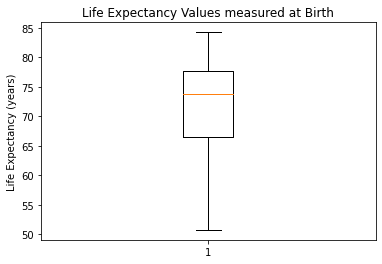

In [4]:
# create a box plot of life expectancy values and assess for outliers
life_expectancies = life_expectancy_2019_both_sexes_df['First Tooltip']
fig1, ax1 = plt.subplots()
ax1.set_title("Life Expectancy Values measured at Birth")
ax1.set_ylabel("Life Expectancy (years)")
ax1.boxplot(life_expectancies)

# we should not be concerned with outliers in the life expectancy dataset for the year 2019 for the both sexes category


The r-squared is: 0.48835664163995207
The correlation coefficient between literacy rate and life expectancy is 0.7


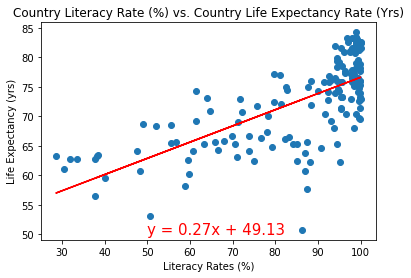

In [15]:
# Read in literacy rates dataset 
literacy_rates_df = pd.read_csv("Resources\Education\cross-country-literacy-rates.csv")

literacy_rates_df.rename(columns={'Literacy rates (World Bank, CIA World Factbook, and other sources)':'Literacy Rates'}, inplace=True)
literacy_rates_df.head(20)

# isolate dataset for literacy rates by country and year of data
literacy_rates = literacy_rates_df.groupby('Entity')
literacy_rates = literacy_rates.describe()
year_max = literacy_rates['Year']['max']
literacy_max = literacy_rates['Literacy Rates']['max']
literacy_max.head()

# merge literacy rate data with life expectancy data on country index
combined_df = pd.merge(life_expectancy_2019_both_sexes_df, literacy_max, on='Entity')
combined_df.rename(columns={'max':'Literacy Rate'},inplace=True)
lit_rates = combined_df['Literacy Rate']
life_exp = combined_df['First Tooltip']

# Create scatter plot and linear regression of literacy data vs life expectancy data
(slope, intercept, rvalue, pvalue, stderr) = linregress(lit_rates, life_exp)
regress_values = lit_rates * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(lit_rates, life_exp)
plt.plot(lit_rates, regress_values, "r-")
plt.annotate(line_eq,(50,50),fontsize = 15, color = "red")
print(f"The r-squared is: {rvalue**2}")
plt.xlabel('Literacy Rates (%)')
plt.ylabel('Life Expectancy (yrs)')
plt.title('Country Literacy Rate (%) vs. Country Life Expectancy Rate (Yrs)')
print(f"The correlation coefficient between literacy rate and life expectancy is {round(st.pearsonr(lit_rates,life_exp)[0],2)}")
literacy_corr = st.pearsonr(lit_rates,life_exp)[0]

The r-squared is: 0.5673054979275889
The correlation coefficient between student/teacher ratio in primary education and life expectancy is -0.75


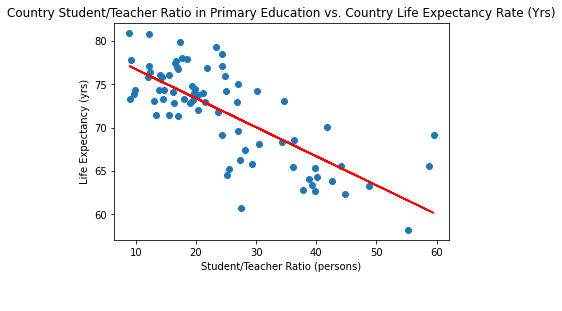

In [53]:
# Read in Teaching Staff dataset 
teaching_staff_df = pd.read_csv("Resources\Education\Teaching_Staff_in_Education.csv", encoding = "ISO-8859-1")
teaching_staff_df.head(50)
pupil_teacher_ratio_primary_df = teaching_staff_df.loc[(teaching_staff_df['Series'] == 'Pupil-teacher ratio in primary education')]
pupil_teacher_ratio_primary_df = pupil_teacher_ratio_primary_df.loc[(pupil_teacher_ratio_primary_df['Year'] == 2018)]
pupil_teacher_ratio_primary_df.count()
pupil_teacher_ratio_primary_df.rename(columns={'Unnamed: 1':'Entity'}, inplace = True)
pupil_teacher_ratio_primary_df.head()
combined_df = pd.merge(life_expectancy_2019_both_sexes_df, pupil_teacher_ratio_primary_df, on='Entity')
combined_df.rename(columns={'First Tooltip':'Life Expectancy','Value':'Student/Teacher Ratio'}, inplace = True)
combined_df

student_teacher_ratio = combined_df['Student/Teacher Ratio']
life_exp = combined_df['Life Expectancy']

# Create scatter plot and linear regression of literacy data vs life expectancy data
(slope, intercept, rvalue, pvalue, stderr) = linregress(student_teacher_ratio, life_exp)
regress_values = student_teacher_ratio * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(student_teacher_ratio, life_exp)
plt.plot(student_teacher_ratio, regress_values, "r-")
plt.annotate(line_eq,(50,50),fontsize = 15, color = "red")
print(f"The r-squared is: {rvalue**2}")
plt.xlabel('Student/Teacher Ratio (persons)')
plt.ylabel('Life Expectancy (yrs)')
plt.title('Country Student/Teacher Ratio in Primary Education vs. Country Life Expectancy Rate (Yrs)')
print(f"The correlation coefficient between student/teacher ratio in primary education and life expectancy is {round(st.pearsonr(student_teacher_ratio,life_exp)[0],2)}")
literacy_corr = st.pearsonr(student_teacher_ratio,life_exp)[0]


The r-squared is: 0.013254604326984627
The correlation coefficient between % of GDP spent on education and life expectancy is 0.12
C:\Users\GPSchool\Anaconda3\envs\PythonData\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


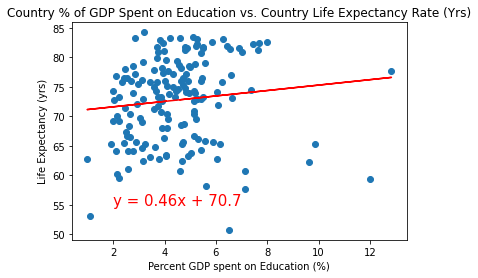

In [104]:
# Read in Public Expenditure data
public_expenditure_df = pd.read_csv("Resources\Education\Public_Expenditure_on_Education.csv", encoding = "ISO-8859-1")
public_expenditure_df.head(50)
education_spending = public_expenditure_df.loc[(public_expenditure_df['Unnamed: 3'] == 'Public expenditure on education (% of GDP)')]
education_spending.rename(columns={'Unnamed: 2':'Year','Unnamed: 4':'% GDP'}, inplace = True)
grouped_education_spending = education_spending.groupby('Public expenditure on education (new)')
df = education_spending.groupby('Public expenditure on education (new)')['Year'].transform(max) == education_spending['Year']
education_spending[df]
education_spending.rename(columns={'Public expenditure on education (new)':'Entity'}, inplace=True)
education_spending[df]

combined_df = pd.merge(life_expectancy_2019_both_sexes_df, education_spending[df], on='Entity')
combined_df.rename(columns={'First Tooltip':'Life Expectancy'}, inplace=True)

df = combined_df['% GDP']
life_exp = combined_df['Life Expectancy']
percent_GDP = df.astype(float)
percent_GDP
#Create scatter plot and linear regression of literacy data vs life expectancy data
(slope, intercept, rvalue, pvalue, stderr) = linregress(percent_GDP, life_exp)
regress_values = percent_GDP * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(percent_GDP, life_exp)
plt.plot(percent_GDP, regress_values, "r-")
plt.annotate(line_eq,(2,55),fontsize = 15, color = "red")
print(f"The r-squared is: {rvalue**2}")
plt.xlabel('Percent GDP spent on Education (%)')
plt.ylabel('Life Expectancy (yrs)')
plt.title('Country % of GDP Spent on Education vs. Country Life Expectancy Rate (Yrs)')
print(f"The correlation coefficient between % of GDP spent on education and life expectancy is {round(st.pearsonr(percent_GDP,life_exp)[0],2)}")
literacy_corr = st.pearsonr(percent_GDP,life_exp)[0]
